In [2]:
!pip install xgboost

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(1)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0


In [5]:
df_test.head(1)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2


In [6]:
df_train.drop('id',axis = 1,inplace=True)
df_test.drop('id',axis = 1,inplace=True)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.3+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for i in df_train.columns:
    if df_train[i].dtype == object:
        label = LabelEncoder()
        df_train[i] = label.fit_transform(df_train[i])
        df_test[i] = label.transform(df_test[i])

In [11]:
X_train = df_train.drop('loan_status',axis=1)
y_train = df_train['loan_status']
X_test = df_test.copy()

# XGBoost

In [12]:
from xgboost import XGBClassifier

In [13]:
model = XGBClassifier()

In [16]:
from sklearn.model_selection import GridSearchCV

In [40]:
params = {
    'n_estimators' : [60,80],
}

In [41]:
final_model = GridSearchCV(model,param_grid=params,cv=5,verbose=2)

In [42]:
final_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....................................n_estimators=60; total time=   0.3s
[CV] END ....................................n_estimators=60; total time=   0.2s
[CV] END ....................................n_estimators=60; total time=   0.2s
[CV] END ....................................n_estimators=60; total time=   0.2s
[CV] END ....................................n_estimators=60; total time=   0.2s
[CV] END ....................................n_estimators=80; total time=   0.3s
[CV] END ....................................n_estimators=80; total time=   0.3s
[CV] END ....................................n_estimators=80; total time=   0.3s
[CV] END ....................................n_estimators=80; total time=   0.3s
[CV] END ....................................n_estimators=80; total time=   0.3s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'n_estimators': [60, 80]}, verbose=2)

In [43]:
df_sub = pd.read_csv('sample_submission.csv')

In [44]:
final_model.best_params_

{'n_estimators': 60}

In [45]:
y_pred = final_model.predict_proba(X_test)

In [46]:
df_sub['loan_status'] = y_pred[::,1]

In [47]:
y_pred = final_model.predict(X_test)

In [48]:
df_sub.to_csv('sub.csv',index_label=False,index=False)

# RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier()

In [51]:
params = {
    'n_estimators' : [60,80,100,150],
    'criterion' : ["gini", "entropy", "log_loss"]
}

In [52]:
final_model = GridSearchCV(model,param_grid=params,cv=3,verbose=2)

In [53]:
final_model.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................criterion=gini, n_estimators=60; total time=   3.7s
[CV] END ....................criterion=gini, n_estimators=60; total time=   3.9s
[CV] END ....................criterion=gini, n_estimators=60; total time=   3.9s
[CV] END ....................criterion=gini, n_estimators=80; total time=   5.1s
[CV] END ....................criterion=gini, n_estimators=80; total time=   5.4s
[CV] END ....................criterion=gini, n_estimators=80; total time=   5.9s
[CV] END ...................criterion=gini, n_estimators=100; total time=   6.8s
[CV] END ...................criterion=gini, n_estimators=100; total time=   6.5s
[CV] END ...................criterion=gini, n_estimators=100; total time=   6.4s
[CV] END ...................criterion=gini, n_estimators=150; total time=   9.5s
[CV] END ...................criterion=gini, n_estimators=150; total time=   9.6s
[CV] END ...................criterion=gini, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [60, 80, 100, 150]},
             verbose=2)

In [54]:
df_sub.to_csv('sub.csv',index_label=False,index=False)

In [55]:
final_model.best_params_

{'criterion': 'entropy', 'n_estimators': 150}

In [59]:
y_pred = final_model.predict_proba(X_test)

In [60]:
df_sub = pd.read_csv('sample_submission.csv')

In [61]:
df_sub['loan_status'] = y_pred[::,1]

In [62]:
df_sub.to_csv('sub.csv',index_label=False,index=False)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
pipe = Pipeline([('scaler',scaler),('model',model)])

In [25]:
from sklearn.model_selection import GridSearchCV

In [69]:
params = {
    'model__penalty' : ['l2','l1','elasticnet', None],
    'model__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__max_iter' : [100,500,1000]
}

In [78]:
final_model = GridSearchCV(pipe, param_grid=params,cv=9,verbose=2)

In [79]:
final_model.fit(X_train,y_train)

Fitting 9 folds for each of 72 candidates, totalling 648 fits
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=100, model__penalty=l2, model__solver=liblinear; total time=   0.0s
[CV] END model__max_iter=100, model__penalty

GridSearchCV(cv=9,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__max_iter': [100, 500, 1000],
                         'model__penalty': ['l2', 'l1', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [80]:
final_model.best_params_

{'model__max_iter': 100, 'model__penalty': None, 'model__solver': 'sag'}

In [81]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [82]:
y_pred = final_model.predict_proba(X_test)

In [75]:
df_sub = pd.read_csv('sample_submission.csv')

In [76]:
df_sub['loan_status'] = y_pred[::,1]

In [77]:
df_sub.to_csv('sub.csv',index_label=False,index=False)

In [29]:
y_pred

array([[0.01876717, 0.98123283],
       [0.97545049, 0.02454951],
       [0.36621365, 0.63378635],
       ...,
       [0.9702757 , 0.0297243 ],
       [0.24040851, 0.75959149],
       [0.25068294, 0.74931706]], shape=(39098, 2))

# Scaler

In [30]:
model = LogisticRegression()

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [257]:
X = df_train.drop('loan_status',axis=1)

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

In [35]:
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = model.predict_proba(X_test)

In [37]:
df_sub['loan_status'] = y_pred[::,1]

In [38]:
df_sub.to_csv('final.csv',index=False,index_label=False)

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model = KNeighborsClassifier()

In [60]:
params = {
    'n_neighbors' : [i for i in range(1,17)],
    'metric' : ['minkowski', 'euclidean','manhattan']
}

In [61]:
final_model = GridSearchCV(model,param_grid=params,cv=3,verbose=2)

In [62]:
X_train = df_train.drop('loan_status',axis=1)
y_train = df_train['loan_status']
X_test = df_test.copy()

In [63]:
final_model.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ....................metric=minkowski, n_neighbors=1; total time=   0.7s
[CV] END ....................metric=minkowski, n_neighbors=1; total time=   0.6s
[CV] END ....................metric=minkowski, n_neighbors=1; total time=   0.6s
[CV] END ....................metric=minkowski, n_neighbors=2; total time=   0.7s
[CV] END ....................metric=minkowski, n_neighbors=2; total time=   0.7s
[CV] END ....................metric=minkowski, n_neighbors=2; total time=   0.6s
[CV] END ....................metric=minkowski, n_neighbors=3; total time=   0.6s
[CV] END ....................metric=minkowski, n_neighbors=3; total time=   0.7s
[CV] END ....................metric=minkowski, n_neighbors=3; total time=   0.7s
[CV] END ....................metric=minkowski, n_neighbors=4; total time=   0.7s
[CV] END ....................metric=minkowski, n_neighbors=4; total time=   0.9s
[CV] END ....................metric=minkowski, 

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16]},
             verbose=2)

In [64]:
y_pred = final_model.predict_proba(X_test)

In [65]:
df_sub['loan_status'] = y_pred[::,1]

In [66]:
df_sub.to_csv('sub.csv',index=False,index_label=False)

In [13]:
df_train.corr()

,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
person_income,1.000000,-0.282072,0.164042,-0.059279,0.310942,-0.057611,-0.280314,-0.035514,0.082727,-0.169956
person_home_ownership,-0.282072,1.000000,-0.292121,0.186281,-0.114323,0.206296,0.160286,0.100410,-0.045610,0.220167
person_emp_length,0.164042,-0.292121,1.000000,-0.091514,0.092046,-0.101910,-0.065824,-0.054467,0.102842,-0.100428
loan_grade,-0.059279,0.186281,-0.091514,1.000000,0.113273,0.935837,0.153865,0.550677,0.012276,0.385908
loan_amnt,0.310942,-0.114323,0.092046,0.113273,1.000000,0.113582,0.647266,0.020271,0.045720,0.144982
loan_int_rate,-0.057611,0.206296,-0.101910,0.935837,0.113582,1.000000,0.152201,0.501841,0.007535,0.338948
loan_percent_income,-0.280314,0.160286,-0.065824,0.153865,0.647266,0.152201,1.000000,0.042979,-0.023202,0.378280
cb_person_default_on_file,-0.035514,0.100410,-0.054467,0.550677,0.020271,0.501841,0.042979,1.000000,0.004886,0.186962
cb_person_cred_hist_length,0.082727,-0.045610,0.102842,0.012276,0.045720,0.007535,-0.023202,0.004886,1.000000,-0.003030
loan_status,-0.169956,0.220167,-0.100428,0.385908,0.144982,0.338948,0.378280,0.186962,-0.003030,1.000000


In [12]:
df_train.drop('person_age',axis=1,inplace=True)
df_test.drop('person_age',axis=1,inplace=True)
df_train.drop('loan_intent',axis=1,inplace=True)
df_test.drop('loan_intent',axis=1,inplace=True)

In [181]:
df_train.drop('cb_person_cred_hist_length',axis=1,inplace=True)
df_test.drop('cb_person_cred_hist_length',axis=1,inplace=True)

In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_income              58645 non-null  int64  
 1   person_home_ownership      58645 non-null  int64  
 2   person_emp_length          58645 non-null  float64
 3   loan_grade                 58645 non-null  int64  
 4   loan_amnt                  58645 non-null  int64  
 5   loan_int_rate              58645 non-null  float64
 6   loan_percent_income        58645 non-null  float64
 7   cb_person_default_on_file  58645 non-null  int64  
 8   loan_status                58645 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.0 MB


<Axes: xlabel='person_income'>

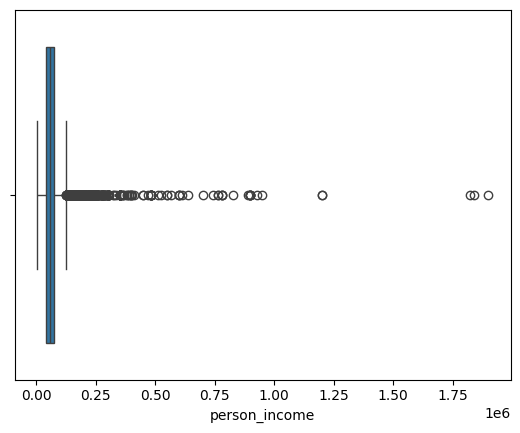

In [183]:
sns.boxplot(x=df_train['person_income'])

In [184]:
df_train['person_income'][df_train['person_income']>0.11] = df_train['person_income'].median()

<Axes: xlabel='person_home_ownership'>

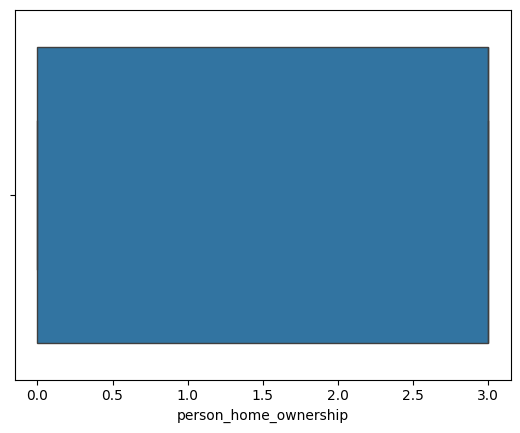

In [185]:
sns.boxplot(x=df_train['person_home_ownership'])

<Axes: xlabel='person_emp_length'>

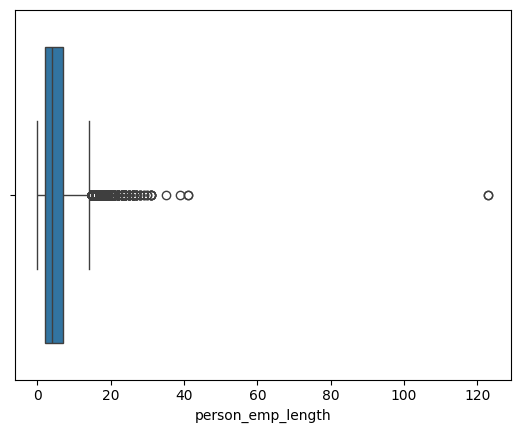

In [186]:
sns.boxplot(x=df_train['person_emp_length'])

In [187]:
df_train['person_emp_length'][df_train['person_emp_length']>12] = df_train['person_emp_length'].median()

<Axes: xlabel='loan_grade'>

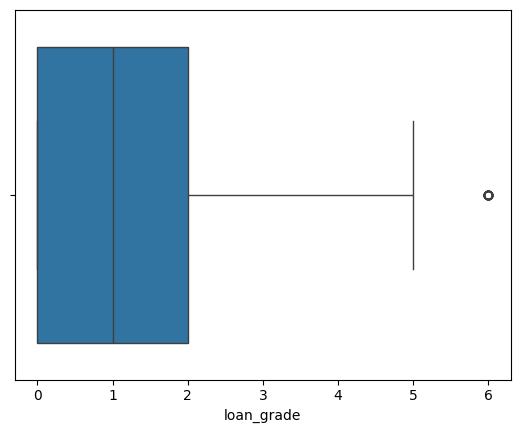

In [188]:
sns.boxplot(x=df_train['loan_grade'])

In [189]:
df_train['loan_grade'][df_train['loan_grade']>=6] = df_train['loan_grade'].median()

<Axes: xlabel='loan_amnt'>

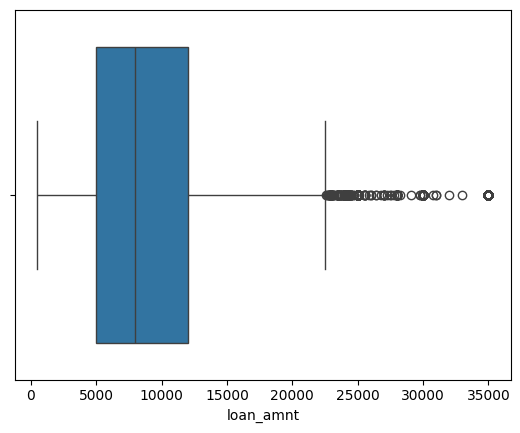

In [190]:
sns.boxplot(x=df_train['loan_amnt'])

In [191]:
df_train['loan_amnt'][df_train['loan_amnt']>22000] = df_train['loan_amnt'].median()

<Axes: xlabel='loan_int_rate'>

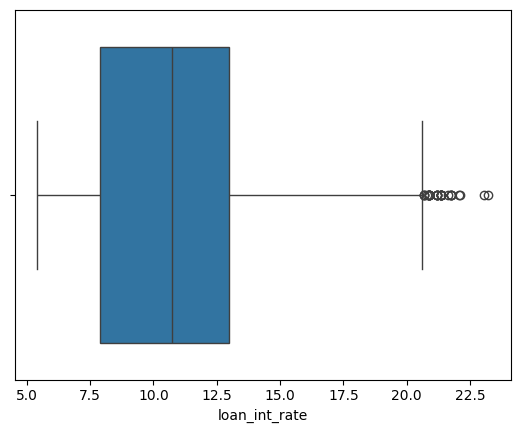

In [192]:
sns.boxplot(x=df_train['loan_int_rate'])

In [193]:
df_train['loan_int_rate'][df_train['loan_int_rate']>20] = df_train['loan_int_rate'].median()

<Axes: xlabel='loan_percent_income'>

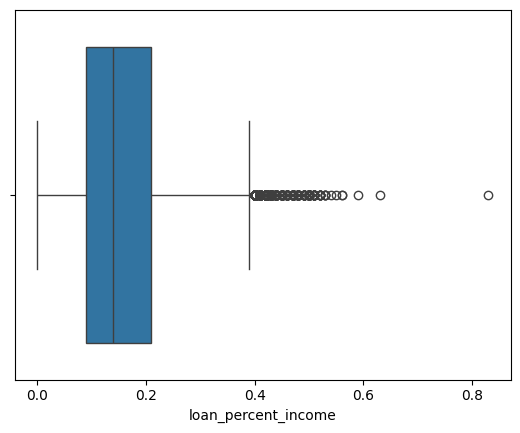

In [194]:
sns.boxplot(x=df_train['loan_percent_income'])

In [195]:
df_train['loan_percent_income'][df_train['loan_percent_income'] > 0.36] = df_train['loan_percent_income'].median()

<Axes: xlabel='cb_person_default_on_file'>

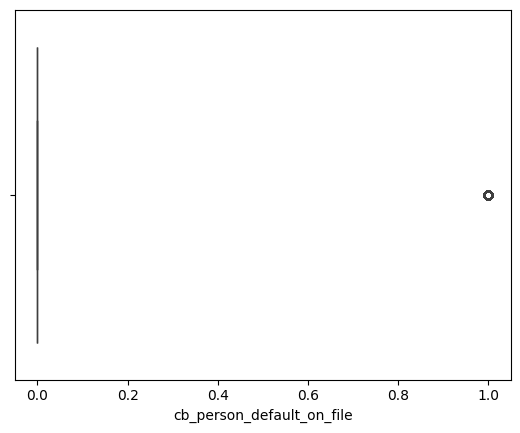

In [196]:
sns.boxplot(x=df_train['cb_person_default_on_file'])

In [197]:
df_train['cb_person_default_on_file'][df_train['cb_person_default_on_file']>=1] = df_train['cb_person_default_on_file'].median()

<Axes: xlabel='person_income'>

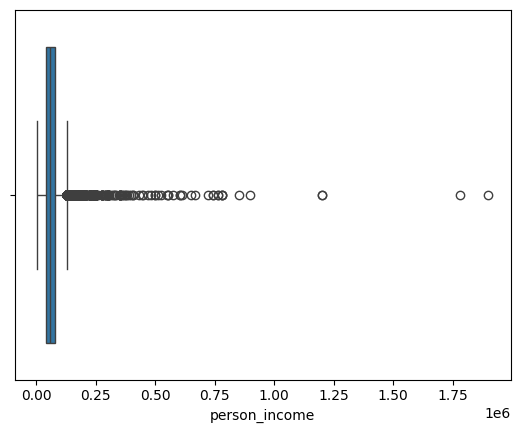

In [198]:
sns.boxplot(x=df_test['person_income'])

In [199]:
df_test['person_income'][df_test['person_income']>0.1] = df_test['person_income'].median()

<Axes: xlabel='person_home_ownership'>

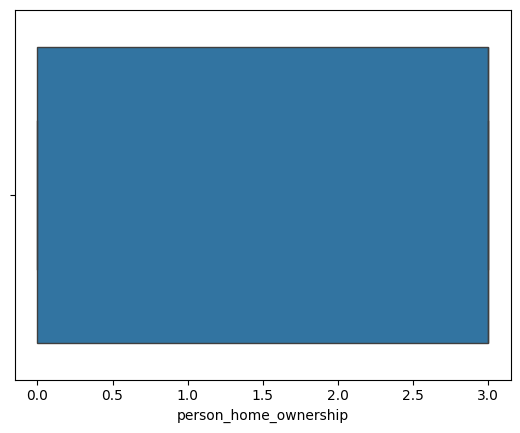

In [200]:
sns.boxplot(x=df_test['person_home_ownership'])

<Axes: xlabel='person_emp_length'>

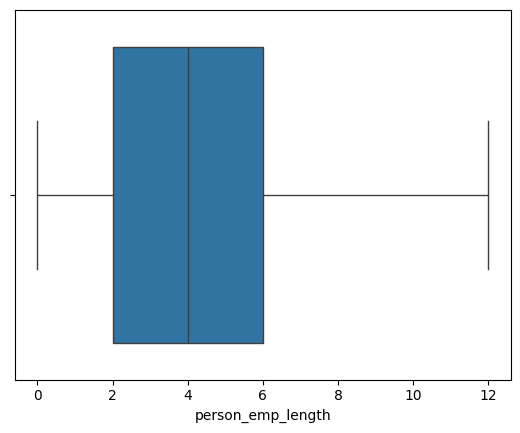

In [205]:
sns.boxplot(x=df_test['person_emp_length'])

In [204]:
df_test['person_emp_length'][df_test['person_emp_length']>12] = df_test['person_emp_length'].median()

<Axes: xlabel='loan_amnt'>

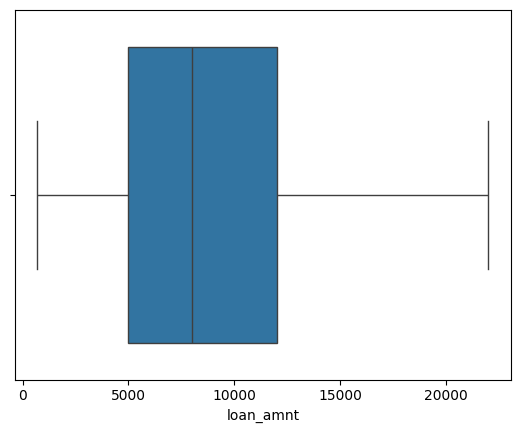

In [208]:
sns.boxplot(x=df_test['loan_amnt'])

In [207]:
df_test['loan_amnt'][df_test['loan_amnt']>22000] = df_test['loan_amnt'].median()

<Axes: xlabel='loan_grade'>

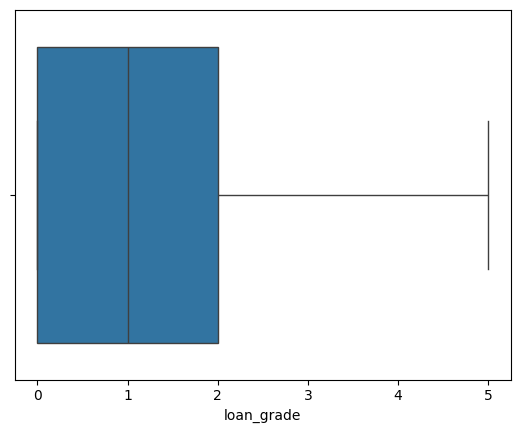

In [212]:
sns.boxplot(x=df_test['loan_grade'])

In [211]:
df_test['loan_grade'][df_test['loan_grade']>=6] = df_test['loan_grade'].median()

<Axes: xlabel='loan_int_rate'>

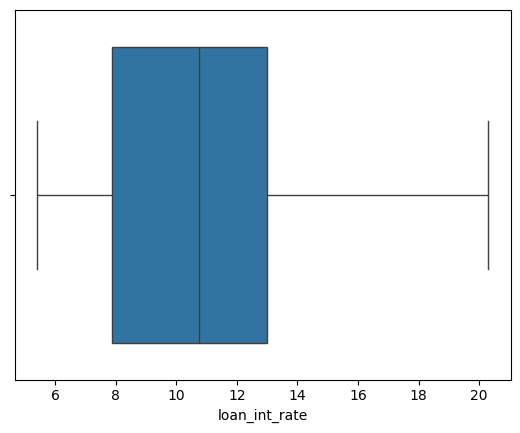

In [217]:
sns.boxplot(x=df_test['loan_int_rate'])

In [216]:
df_test['loan_int_rate'][df_test['loan_int_rate']>20.5] = df_test['loan_int_rate'].median()

<Axes: xlabel='loan_percent_income'>

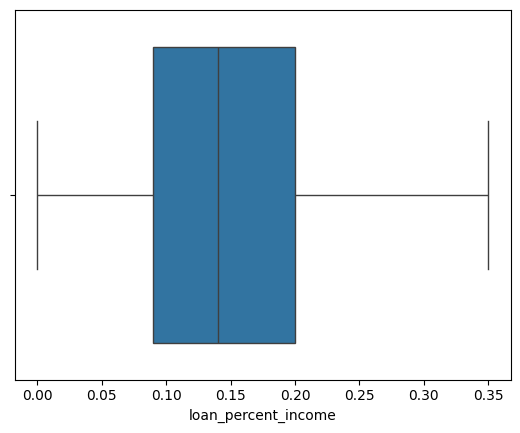

In [222]:
sns.boxplot(x=df_test['loan_percent_income'])

In [221]:
df_test['loan_percent_income'][df_test['loan_percent_income']>0.35] = df_test['loan_percent_income'].median()

<Axes: xlabel='cb_person_default_on_file'>

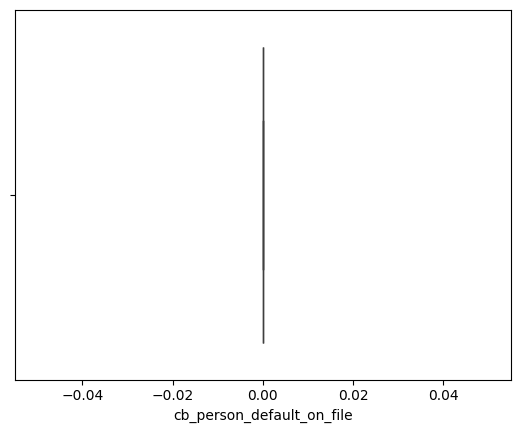

In [225]:
sns.boxplot(x=df_test['cb_person_default_on_file'])

In [224]:
df_test['cb_person_default_on_file'][df_test['cb_person_default_on_file']>=1] = df_test['cb_person_default_on_file'].median()